# importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression,SelectKBest,SelectPercentile
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score

# =====================================================
# Obtenção dos Dados
# =====================================================

In [ ]:
df=pd.read_csv('/content/CAGED_GV.csv',sep=';')
df

,saldo,idade,horascontratuais,indtrabintermitente,indtrabparcial,salario,indicadoraprendiz,month,year,estado,municipio,desc_subclasse,desc_classe,desc_grupo,desc_divisao,desc_secao,titulo_ocupacao,titulo_familia,titulo_subgrupo,titulo_subprincipal,titulo_grandegp,descricao,desc_instr,desc_sexo,desc_raca,desc_def
0,1,33,40,0,0,2784,0,1,2019,ES,Vitoria,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,INDÚSTRIAS EXTRATIVAS,Operador de transporte multimodal,Especialistas em log�stica de transportes,T�CNICOS EM TRANSPORTES (LOG�STICA),T�CNICOS DE N�VEL M�DIO EM SERVI�OS DE TRANSPO...,T�CNICOS DE NIVEL M�DIO,Admissão por primeiro,Médio Completo,Mulher,Branca,Não Deficiente
1,1,19,44,0,0,1045,0,1,2019,ES,Serra,APARELHAMENTO DE PLACAS E EXECUÇÃO DE TRABALHO...,APARELHAMENTO E OUTROS TRABALHOS EM PEDRAS,APARELHAMENTO DE PEDRAS E FABRICAÇÃO DE OUTROS...,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Servente de obras,Ajudantes de obras civis,AJUDANTES DE OBRAS,TRABALHADORES DA IND�STRIA EXTRATIVA E DA CONS...,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Completo,Homem,Parda,Não Deficiente
2,1,16,22,0,0,499,1,1,2019,ES,Serra,APARELHAMENTO DE PLACAS E EXECUÇÃO DE TRABALHO...,APARELHAMENTO E OUTROS TRABALHOS EM PEDRAS,APARELHAMENTO DE PEDRAS E FABRICAÇÃO DE OUTROS...,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Auxiliar de escrit�rio,"Agentes, assistentes e auxiliares administrativos","ESCRITUR�RIOS EM GERAL, AGENTES, ASSISTENTES E...",ESCRITUR�RIOS,TRABALHADORES DE SERVI�OS ADMINISTRATIVOS,Admissão por primeiro,Médio Incompleto,Mulher,Parda,Não Deficiente
3,1,19,44,0,0,1205,0,1,2019,ES,Serra,FABRICAÇÃO DE ESTRUTURAS PRÉ MOLDADAS DE CONCR...,"FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...","FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...",FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Alimentador de linha de produ��o,Alimentadores de linhas de produ��o,EMBALADORES E ALIMENTADORES DE PRODU��O,TRABALHADORES DE FUN��ES TRANSVERSAIS,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Incompleto,Homem,Parda,Não Deficiente
4,1,19,44,0,0,1205,0,1,2019,ES,Serra,FABRICAÇÃO DE ESTRUTURAS PRÉ MOLDADAS DE CONCR...,"FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...","FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...",FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Alimentador de linha de produ��o,Alimentadores de linhas de produ��o,EMBALADORES E ALIMENTADORES DE PRODU��O,TRABALHADORES DE FUN��ES TRANSVERSAIS,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Incompleto,Homem,Parda,Não Deficiente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317299,1,29,44,0,0,1776,0,11,2019,ES,Vila Velha,"COMÉRCIO VAREJISTA DE COSMÉTICOS, PRODUTOS DE ...","COMÉRCIO VAREJISTA DE COSMÉTICOS, PRODUTOS DE ...","COMÉRCIO VAREJISTA DE PRODUTOS FARMACÊUTICOS, ...",COMÉRCIO VAREJISTA,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...,Analista de exporta��o e importa��o,Analistas de com�rcio exterior,T�CNICOS DE NIVEL M�DIO EM OPERA��ES COMERCIAIS,T�CNICOS DE NIVEL M�DIO NAS CI�NCIAS ADMINISTR...,T�CNICOS DE NIVEL M�DIO,Admissão por reempreg,Superior Completo,Mulher,Parda,Não Deficiente
317300,1,28,44,0,0,1143,0,11,2019,ES,Vila Velha,"COMÉRCIO VAREJISTA DE COSMÉTICOS, PRODUTOS DE ...","COMÉRCIO VAREJISTA DE COSMÉTICOS, PRODUTOS DE ...","COMÉRCIO VAREJISTA DE PRODUTOS FARMACÊUTICOS, ...",COMÉRCIO VAREJISTA,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...,Vendedor de com�rcio varejista,Operadores do com�rcio em lojas e mercados,VENDEDORES E DEMONSTRADORES,VENDEDORES E PRESTADORES DE SERVI�OS DO COM�RCIO,"TRABALHADORES DOS SERVI�OS, VENDEDORES DO COM�...",Admissão por reempreg,Superior Completo,Mulher,Parda,Não Deficiente


In [ ]:
best_df=df
stat_data = best_df.describe(include=[object]).T
stat_data['nulos']= pd.DataFrame(best_df.isnull().sum())
stat_data['percent_nulos']= pd.DataFrame(best_df.isna().mean().round(4) * 100)
stat_data["type"] = pd.Series(best_df.dtypes)
stat_data_objetct=stat_data
stat_data_objetct

,count,unique,top,freq,nulos,percent_nulos,type
estado,317304,1,ES,317304,0,0.0,object
municipio,317304,5,Serra,105494,0,0.0,object
desc_subclasse,315075,864,"COMÉRCIO VAREJISTA DE MERCADORIAS EM GERAL, CO...",12248,2229,0.7,object
desc_classe,315075,514,RESTAURANTES E OUTROS ESTABELECIMENTOS DE SERV...,16718,2229,0.7,object
desc_grupo,315074,239,RESTAURANTES E OUTROS SERVIÇOS DE ALIMENTAÇÃO ...,16823,2230,0.7,object
desc_divisao,315074,85,COMÉRCIO VAREJISTA,59800,2230,0.7,object
desc_secao,315074,21,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...,85691,2230,0.7,object
titulo_ocupacao,317293,1564,Vendedor de com�rcio varejista,21266,11,0.0,object
titulo_familia,317293,517,Operadores do com�rcio em lojas e mercados,38011,11,0.0,object
titulo_subgrupo,317293,177,VENDEDORES E DEMONSTRADORES,38011,11,0.0,object


In [ ]:
best_df=df
stat_data = best_df.describe(include=[np.number]).T
stat_data['nulos']= pd.DataFrame(best_df.isnull().sum())
stat_data['percent_nulos']= pd.DataFrame(df.isna().mean().round(4) * 100)
stat_data["type"] = pd.Series(df.dtypes)
stat_data["median"] = pd.Series(df.median(numeric_only=True))
stat_data_numbers=stat_data
stat_data_numbers

,count,mean,std,min,25%,50%,75%,max,nulos,percent_nulos,type,median
saldo,317304.0,0.044784,0.998998,-1.0,-1.0,1.0,1.0,1.0,0,0.0,int64,1.0
idade,317304.0,32.824780,10.787556,11.0,24.0,31.0,40.0,97.0,0,0.0,int64,31.0
horascontratuais,317304.0,40.963590,7.925689,1.0,44.0,44.0,44.0,44.0,0,0.0,int64,44.0
indtrabintermitente,317304.0,0.011771,0.107854,0.0,0.0,0.0,0.0,1.0,0,0.0,int64,0.0
indtrabparcial,317304.0,0.003949,0.062716,0.0,0.0,0.0,0.0,1.0,0,0.0,int64,0.0
salario,317304.0,1544.849712,1559.624092,0.0,1100.0,1207.0,1639.0,146229.0,0,0.0,int64,1207.0
indicadoraprendiz,317304.0,0.032893,0.178356,0.0,0.0,0.0,0.0,1.0,0,0.0,int64,0.0
month,317304.0,5.604773,2.955458,1.0,3.0,6.0,8.0,11.0,0,0.0,int64,6.0
year,317304.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0,0,0.0,int64,2019.0


# Análise de Nulos

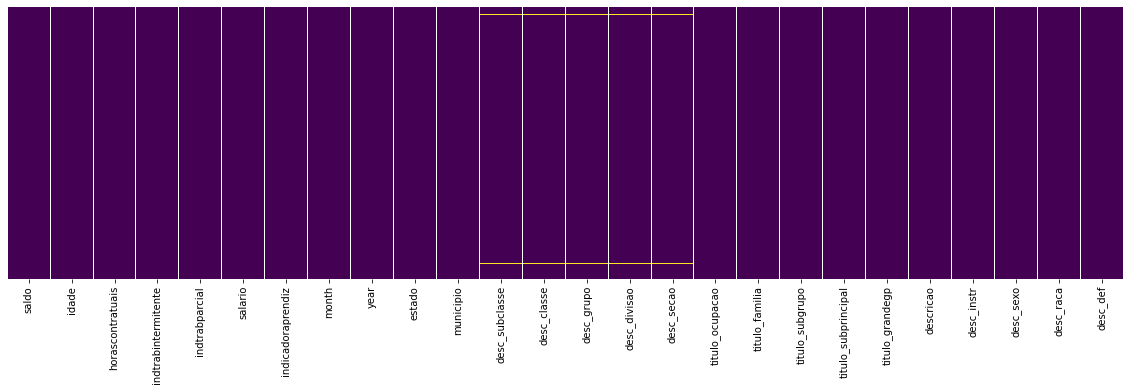

In [ ]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis',
           ax=ax)

# preenche com base na moda

In [ ]:
mode_sexo = df['desc_sexo'].mode()[0]
mode_idade = df['idade'].mode()[0]
mode_raca = df['desc_raca'].mode()[0]
mode_instr = df['desc_instr'].mode()[0]
mode_def = df['desc_def'].mode()[0]

print(mode_instr)
print(mode_sexo)
print(mode_idade)
print(mode_raca)
print(mode_def)

Médio Completo
Homem
24
Parda
Não Deficiente


In [ ]:
#Preenchendo valores nulos com moda (categorica)
df['desc_sexo'] = df['desc_sexo'].fillna(mode_sexo)
df['idade'] = df['idade'].fillna(mode_idade)
df['desc_raca'] = df['desc_raca'].fillna(mode_raca)
df['desc_def'] = df['desc_def'].fillna(mode_raca)
df['desc_instr'] = df['desc_instr'].fillna(mode_instr)

## Verificando resultado

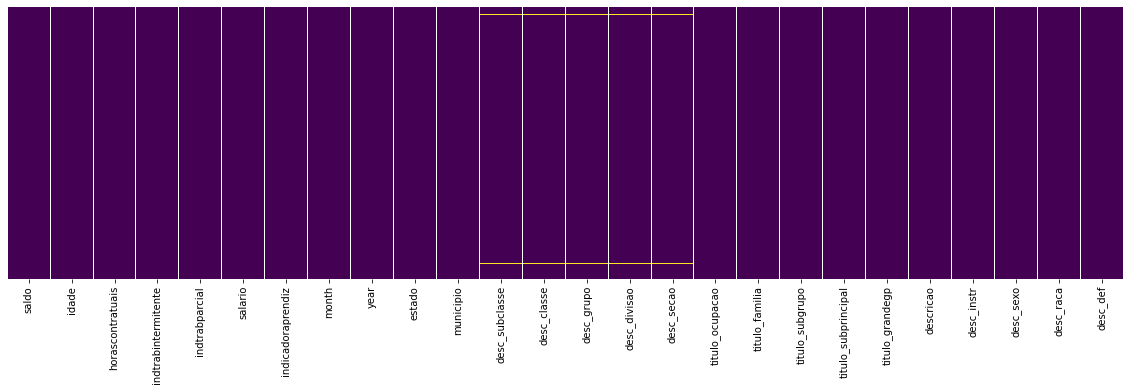

In [ ]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis',
           ax=ax)

# =========================================================
# Grafico de visão geral
# =========================================================

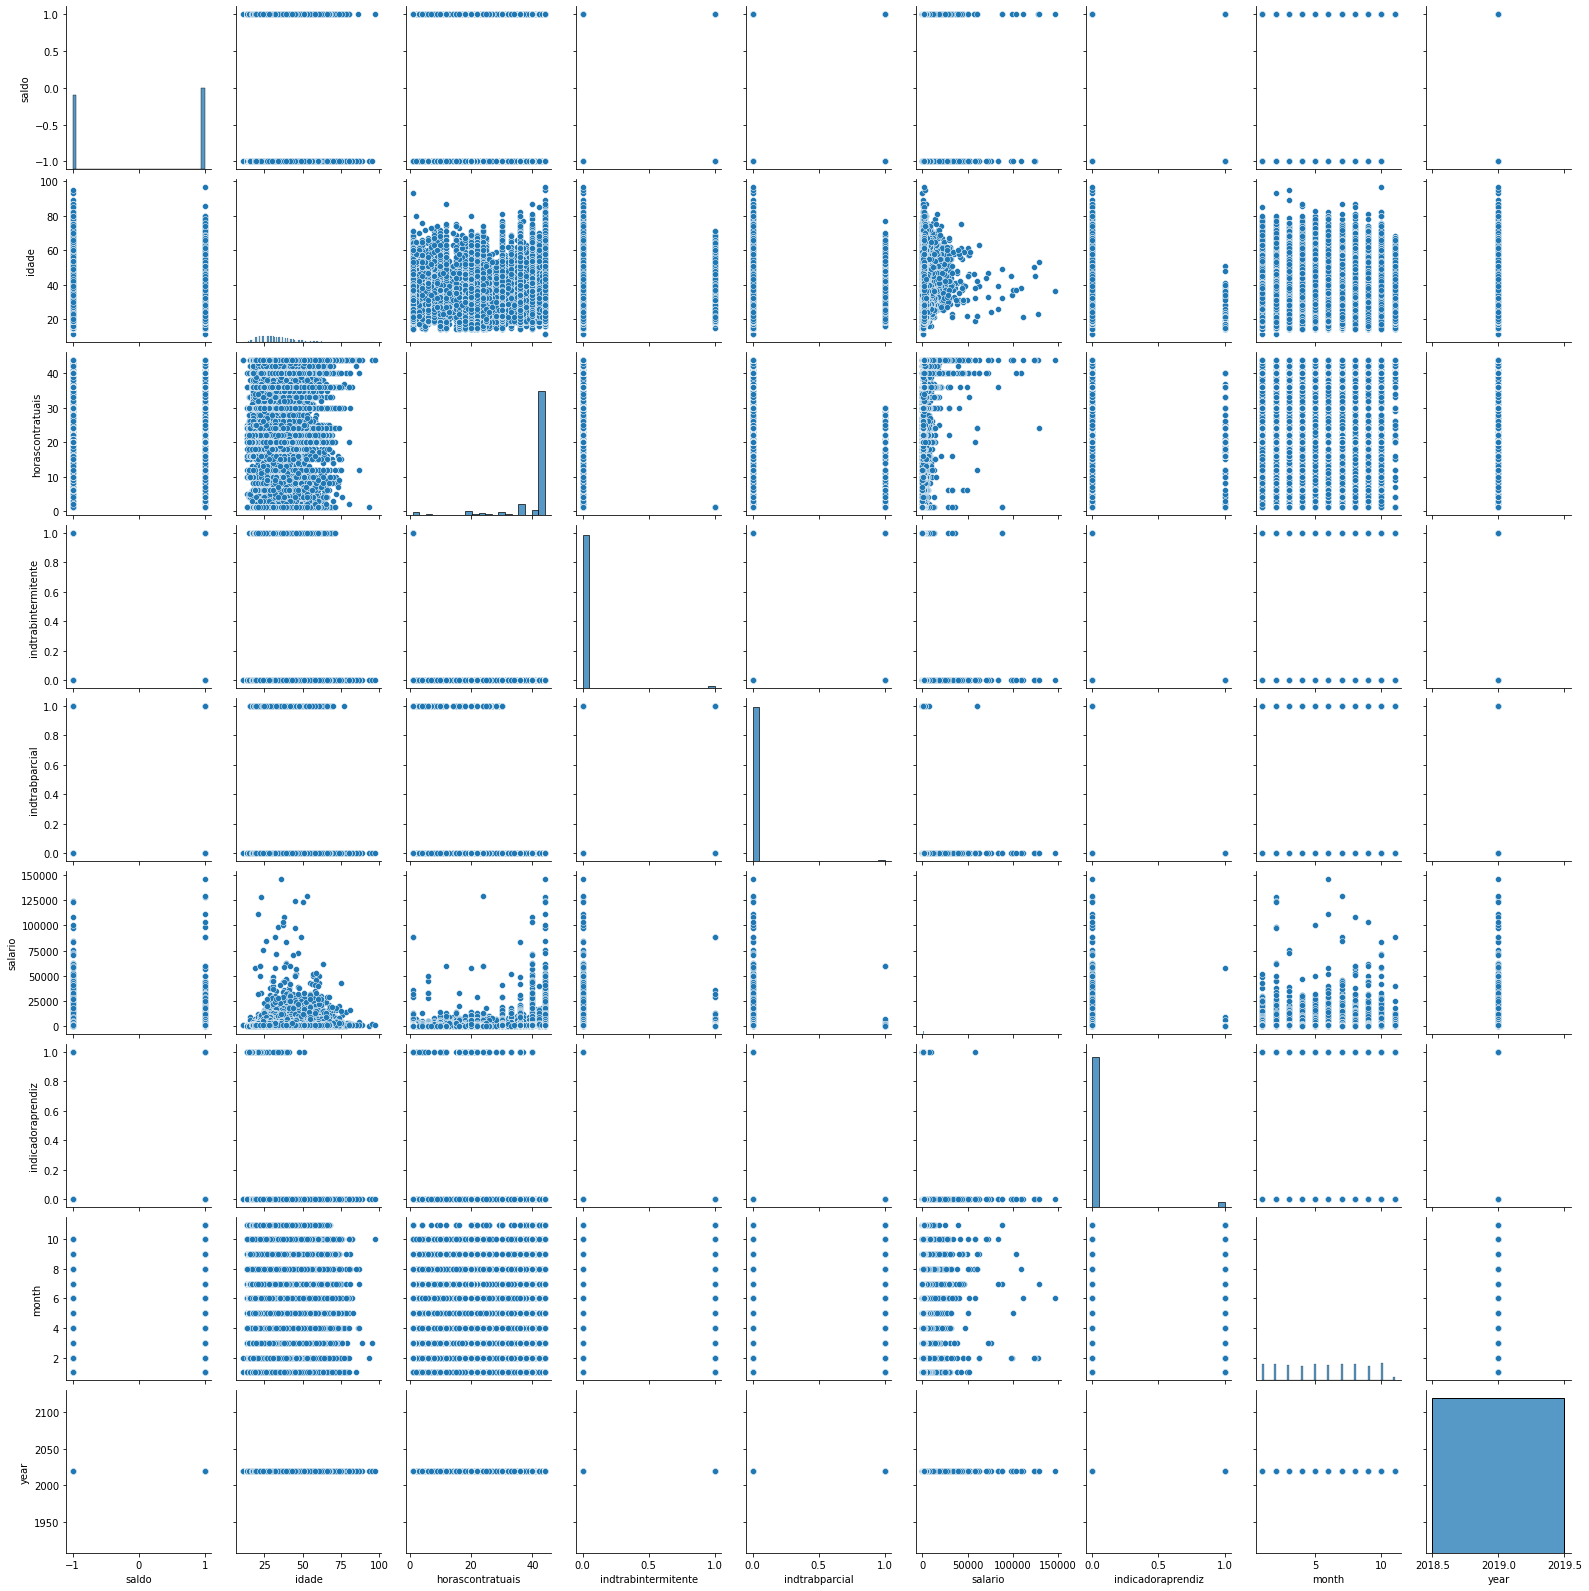

In [ ]:
sns.pairplot(df)

# =========================================================
# Transformação de dados
# =========================================================

In [ ]:
import sys
df['class_salario']=pd.cut(df['salario'], bins=[0, 3000, sys.maxsize], labels=[0, 1])

### Categorizando numericamente os dados

In [ ]:
from sklearn.preprocessing import LabelEncoder
sexo_make = LabelEncoder()
df["desc_sexo_code"] = sexo_make.fit_transform(df["desc_sexo"])
raca_make = LabelEncoder()
df["desc_raca_code"] = raca_make.fit_transform(df["desc_raca"])
instr_make = LabelEncoder()
df["desc_instr_code"] = instr_make.fit_transform(df["desc_instr"])
def_make = LabelEncoder()
df["def_code"] = def_make.fit_transform(df["desc_def"])
df.columns
print(sexo_make.classes_)
print(raca_make.classes_)
print(def_make.classes_)
print(instr_make.classes_)

['Homem' 'Mulher']
['Amarela' 'Branca' 'Indígena' 'Não Identificado' 'Parda' 'Preta']
['Auditiva' 'Física' 'Intelectual (Mental)' 'Múltipla' 'Não Deficiente'
 'Parda' 'Reabilitado' 'Visual']
['5ª Completo Fundamental' '6ª a 9ª Fundamental' 'Analfabeto'
 'Até 5ª Incompleto' 'Fundamental Completo' 'Médio Completo'
 'Médio Incompleto' 'Superior Completo' 'Superior Incompleto']


### Categorizando o Target

In [ ]:
df_label_encoder = df.copy()
target_make = LabelEncoder()
df.insert (6, "class_salario_target", target_make.fit_transform(df["class_salario"]))

In [ ]:
df

,saldo,idade,horascontratuais,indtrabintermitente,indtrabparcial,salario,class_salario_target,indicadoraprendiz,month,year,estado,municipio,desc_subclasse,desc_classe,desc_grupo,desc_divisao,desc_secao,titulo_ocupacao,titulo_familia,titulo_subgrupo,titulo_subprincipal,titulo_grandegp,descricao,desc_instr,desc_sexo,desc_raca,desc_def,class_salario,desc_sexo_code,desc_raca_code,desc_instr_code,def_code
0,1,33,40,0,0,2784,0,0,1,2019,ES,Vitoria,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,INDÚSTRIAS EXTRATIVAS,Operador de transporte multimodal,Especialistas em log�stica de transportes,T�CNICOS EM TRANSPORTES (LOG�STICA),T�CNICOS DE N�VEL M�DIO EM SERVI�OS DE TRANSPO...,T�CNICOS DE NIVEL M�DIO,Admissão por primeiro,Médio Completo,Mulher,Branca,Não Deficiente,0,1,1,5,4
1,1,19,44,0,0,1045,0,0,1,2019,ES,Serra,APARELHAMENTO DE PLACAS E EXECUÇÃO DE TRABALHO...,APARELHAMENTO E OUTROS TRABALHOS EM PEDRAS,APARELHAMENTO DE PEDRAS E FABRICAÇÃO DE OUTROS...,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Servente de obras,Ajudantes de obras civis,AJUDANTES DE OBRAS,TRABALHADORES DA IND�STRIA EXTRATIVA E DA CONS...,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Completo,Homem,Parda,Não Deficiente,0,0,4,5,4
2,1,16,22,0,0,499,0,1,1,2019,ES,Serra,APARELHAMENTO DE PLACAS E EXECUÇÃO DE TRABALHO...,APARELHAMENTO E OUTROS TRABALHOS EM PEDRAS,APARELHAMENTO DE PEDRAS E FABRICAÇÃO DE OUTROS...,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Auxiliar de escrit�rio,"Agentes, assistentes e auxiliares administrativos","ESCRITUR�RIOS EM GERAL, AGENTES, ASSISTENTES E...",ESCRITUR�RIOS,TRABALHADORES DE SERVI�OS ADMINISTRATIVOS,Admissão por primeiro,Médio Incompleto,Mulher,Parda,Não Deficiente,0,1,4,6,4
3,1,19,44,0,0,1205,0,0,1,2019,ES,Serra,FABRICAÇÃO DE ESTRUTURAS PRÉ MOLDADAS DE CONCR...,"FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...","FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...",FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Alimentador de linha de produ��o,Alimentadores de linhas de produ��o,EMBALADORES E ALIMENTADORES DE PRODU��O,TRABALHADORES DE FUN��ES TRANSVERSAIS,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Incompleto,Homem,Parda,Não Deficiente,0,0,4,6,4
4,1,19,44,0,0,1205,0,0,1,2019,ES,Serra,FABRICAÇÃO DE ESTRUTURAS PRÉ MOLDADAS DE CONCR...,"FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...","FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...",FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Alimentador de linha de produ��o,Alimentadores de linhas de produ��o,EMBALADORES E ALIMENTADORES DE PRODU��O,TRABALHADORES DE FUN��ES TRANSVERSAIS,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Incompleto,Homem,Parda,Não Deficiente,0,0,4,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317299,1,29,44,0,0,1776,0,0,11,2019,ES,Vila Velha,"COMÉRCIO VAREJISTA DE COSMÉTICOS, PRODUTOS DE ...","COMÉRCIO VAREJISTA DE COSMÉTICOS, PRODUTOS DE ...","COMÉRCIO VAREJISTA DE PRODUTOS FARMACÊUTICOS, ...",COMÉRCIO VAREJISTA,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...,Analista de exporta��o e importa��o,Analistas de com�rcio exterior,T�CNICOS DE NIVEL M�DIO EM OPERA��ES COMERCIAIS,T�CNICOS DE NIVEL M�DIO NAS CI�NCIAS ADMINISTR...,T�CNICOS DE NIVEL M�DIO,Admissão por reempreg,Superior Completo,Mulher,Parda,Não Deficiente,0,1,4,7,4
317300,1,28,44,0,0,1143,0,0,11,2019,ES,Vila Velha,"COMÉRCIO VAREJISTA DE COSMÉTICOS, PRODUTOS DE ...","COMÉRCIO VAREJISTA DE COSMÉTICOS, PRODUTOS DE ...","COMÉRCIO VAREJISTA DE PRODUTOS FARMACÊUTICOS, ...",COMÉRCIO VAREJISTA,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...,Vendedor de com�rcio varejista,Operadores do com�rcio em lojas e mercados,VENDEDORE

# =========================================================
# Balanceando dataset
# =========================================================

In [ ]:
target = 'class_salario'
count_class_0, count_class_1 = df[target].value_counts()
df[target].value_counts()

0    295749
1     17054
Name: class_salario, dtype: int64

In [ ]:
df_class_0 = df[df[target] == 0]
df_class_1 = df[df[target] == 1]

# Over-sampling
### Unindo registros sampler (classe1) e registros da classe 5

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True,random_state=2)
df_class_1_over

,saldo,idade,horascontratuais,indtrabintermitente,indtrabparcial,salario,class_salario_target,indicadoraprendiz,month,year,estado,municipio,desc_subclasse,desc_classe,desc_grupo,desc_divisao,desc_secao,titulo_ocupacao,titulo_familia,titulo_subgrupo,titulo_subprincipal,titulo_grandegp,descricao,desc_instr,desc_sexo,desc_raca,desc_def,class_salario,desc_sexo_code,desc_raca_code,desc_instr_code,def_code
51638,-1,49,44,0,0,9801,1,0,2,2019,ES,Cariacica,COMÉRCIO VAREJISTA DE MEDICAMENTOS VETERINÁRIOS,COMÉRCIO VAREJISTA DE PRODUTOS FARMACÊUTICOS P...,"COMÉRCIO VAREJISTA DE PRODUTOS FARMACÊUTICOS, ...",COMÉRCIO VAREJISTA,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...,T�cnico de vendas,Especialistas em promo��o de produtos e vendas,T�CNICOS DE NIVEL M�DIO EM OPERA��ES COMERCIAIS,T�CNICOS DE NIVEL M�DIO NAS CI�NCIAS ADMINISTR...,T�CNICOS DE NIVEL M�DIO,Desligamento por demi,Médio Completo,Homem,Branca,Não Deficiente,1,0,1,5,4
127617,1,37,44,0,0,15188,1,0,5,2019,ES,Serra,CONSTRUÇÃO DE RODOVIAS E FERROVIAS,CONSTRUÇÃO DE RODOVIAS E FERROVIAS,"CONSTRUÇÃO DE RODOVIAS, FERROVIAS, OBRAS URBAN...",OBRAS DE INFRA-ESTRUTURA,CONSTRUÇÃO,Engenheiro civil,Engenheiros civis e afins,"ENGENHEIROS, ARQUITETOS E AFINS","PROFISSIONAIS DAS CI�NCIAS EXATAS, F�SICAS E D...",PROFISSIONAIS DAS CI�NCIAS E DAS ARTES,Admissão por reempreg,Superior Completo,Homem,Branca,Não Deficiente,1,0,1,7,4
221662,1,48,44,0,0,4206,1,0,8,2019,ES,Serra,CONSTRUÇÃO DE RODOVIAS E FERROVIAS,CONSTRUÇÃO DE RODOVIAS E FERROVIAS,"CONSTRUÇÃO DE RODOVIAS, FERROVIAS, OBRAS URBAN...",OBRAS DE INFRA-ESTRUTURA,CONSTRUÇÃO,Supervisor administrativo,Supervisores administrativos,SUPERVISORES DE SERVI�OS ADMINISTRATIVOS (Exce...,ESCRITUR�RIOS,TRABALHADORES DE SERVI�OS ADMINISTRATIVOS,Admissão por reempreg,Médio Completo,Homem,Parda,Não Deficiente,1,0,4,5,4
21100,-1,27,39,0,0,3327,1,0,1,2019,ES,Vitoria,"SOCIEDADES DE CRÉDITO, FINANCIAMENTO E INVESTI...","SOCIEDADES DE CRÉDITO, FINANCIAMENTO E INVESTI...",INTERMEDIAÇÃO NÃO-MONETÁRIA - OUTROS INSTRUMEN...,ATIVIDADES DE SERVIÇOS FINANCEIROS,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",Gerente de ag�ncia,Gerentes de opera��es de servi�os em institui�...,GERENTES DE PRODU��O E OPERA��ES,GERENTES,"MEMBROS SUPERIORES DO PODER P�BLICO, DIRIGENTE...",Desligamento por demi,Médio Completo,Homem,Branca,Não Deficiente,1,0,1,5,4
275355,-1,33,35,0,0,3410,1,0,9,2019,ES,Vila Velha,"ATIVIDADES DE ATENDIMENTO HOSPITALAR, EXCETO P...",ATIVIDADES DE ATENDIMENTO HOSPITALAR,ATIVIDADES DE ATENDIMENTO HOSPITALAR,ATIVIDADES DE ATENÇÃO À SAÚDE HUMANA,SAÚDE HUMANA E SERVIÇOS SOCIAIS,Farmac�utico analista cl�nico,Farmac�uticos,"PROFISSIONAIS DA MEDICINA, SA�DE E AFINS","PROFISSIONAIS DAS CI�NCIAS BIOL�GICAS, DA SA�D...",PROFISSIONAIS DAS CI�NCIAS E DAS ARTES,Desligamento a pedido,Superior Completo,Mulher,Branca,Não Deficiente,1,1,1,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31374,-1,33,24,0,0,3596,1,0,1,2019,ES,Vila Velha,"ATIVIDADES DE ATENDIMENTO HOSPITALAR, EXCETO P...",ATIVIDADES DE ATENDIMENTO HOSPITALAR,ATIVIDADES DE ATENDIMENTO HOSPITALAR,ATIVIDADES DE ATENÇÃO À SAÚDE HUMANA,SAÚDE HUMANA E SERVIÇOS SOCIAIS,T�cnico em radiologia e imagenologia,Tecn�logos e t�cnicos em m�todos de diagn�stic...,T�CNICOS EM OPERA��O DE EQUIPAMENTOS E INSTRUM...,T�CNICOS DE N�VEL M�DIO DAS CI�NCIAS BIOL�GICA...,T�CNICOS DE NIVEL M�DIO,Desligamento por Térm,Médio Completo,Homem,Parda,Não Deficiente,1,0,4,5,4
208829,-1,34,40,0,0,11414,1,0,7,2019,ES,Vitoria,SERVIÇOS DE ENGENHARIA,SERVIÇOS DE ENGENHARIA,SERVIÇOS DE ARQUITETURA E ENGENHARIA E ATIVIDA...,SERVIÇOS DE ARQUITETURA E ENGENHARIA; TESTES E...,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",Engenheiro de produ��o,"Engenheiros de produ��o, qualidade, seguran�a ...","ENGENHEIROS, ARQUITETOS E AFINS","PROFISSIONAIS DAS CI�NCIAS EXATAS, F�SICAS E D...",PROFISSIONAIS DAS CI�NCIAS E DAS ARTES,Desligamento por demi,Superior Completo,Homem,Pa

In [ ]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over

,saldo,idade,horascontratuais,indtrabintermitente,indtrabparcial,salario,class_salario_target,indicadoraprendiz,month,year,estado,municipio,desc_subclasse,desc_classe,desc_grupo,desc_divisao,desc_secao,titulo_ocupacao,titulo_familia,titulo_subgrupo,titulo_subprincipal,titulo_grandegp,descricao,desc_instr,desc_sexo,desc_raca,desc_def,class_salario,desc_sexo_code,desc_raca_code,desc_instr_code,def_code
0,1,33,40,0,0,2784,0,0,1,2019,ES,Vitoria,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,INDÚSTRIAS EXTRATIVAS,Operador de transporte multimodal,Especialistas em log�stica de transportes,T�CNICOS EM TRANSPORTES (LOG�STICA),T�CNICOS DE N�VEL M�DIO EM SERVI�OS DE TRANSPO...,T�CNICOS DE NIVEL M�DIO,Admissão por primeiro,Médio Completo,Mulher,Branca,Não Deficiente,0,1,1,5,4
1,1,19,44,0,0,1045,0,0,1,2019,ES,Serra,APARELHAMENTO DE PLACAS E EXECUÇÃO DE TRABALHO...,APARELHAMENTO E OUTROS TRABALHOS EM PEDRAS,APARELHAMENTO DE PEDRAS E FABRICAÇÃO DE OUTROS...,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Servente de obras,Ajudantes de obras civis,AJUDANTES DE OBRAS,TRABALHADORES DA IND�STRIA EXTRATIVA E DA CONS...,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Completo,Homem,Parda,Não Deficiente,0,0,4,5,4
2,1,16,22,0,0,499,0,1,1,2019,ES,Serra,APARELHAMENTO DE PLACAS E EXECUÇÃO DE TRABALHO...,APARELHAMENTO E OUTROS TRABALHOS EM PEDRAS,APARELHAMENTO DE PEDRAS E FABRICAÇÃO DE OUTROS...,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Auxiliar de escrit�rio,"Agentes, assistentes e auxiliares administrativos","ESCRITUR�RIOS EM GERAL, AGENTES, ASSISTENTES E...",ESCRITUR�RIOS,TRABALHADORES DE SERVI�OS ADMINISTRATIVOS,Admissão por primeiro,Médio Incompleto,Mulher,Parda,Não Deficiente,0,1,4,6,4
3,1,19,44,0,0,1205,0,0,1,2019,ES,Serra,FABRICAÇÃO DE ESTRUTURAS PRÉ MOLDADAS DE CONCR...,"FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...","FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...",FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Alimentador de linha de produ��o,Alimentadores de linhas de produ��o,EMBALADORES E ALIMENTADORES DE PRODU��O,TRABALHADORES DE FUN��ES TRANSVERSAIS,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Incompleto,Homem,Parda,Não Deficiente,0,0,4,6,4
4,1,19,44,0,0,1205,0,0,1,2019,ES,Serra,FABRICAÇÃO DE ESTRUTURAS PRÉ MOLDADAS DE CONCR...,"FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...","FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...",FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Alimentador de linha de produ��o,Alimentadores de linhas de produ��o,EMBALADORES E ALIMENTADORES DE PRODU��O,TRABALHADORES DE FUN��ES TRANSVERSAIS,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Incompleto,Homem,Parda,Não Deficiente,0,0,4,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31374,-1,33,24,0,0,3596,1,0,1,2019,ES,Vila Velha,"ATIVIDADES DE ATENDIMENTO HOSPITALAR, EXCETO P...",ATIVIDADES DE ATENDIMENTO HOSPITALAR,ATIVIDADES DE ATENDIMENTO HOSPITALAR,ATIVIDADES DE ATENÇÃO À SAÚDE HUMANA,SAÚDE HUMANA E SERVIÇOS SOCIAIS,T�cnico em radiologia e imagenologia,Tecn�logos e t�cnicos em m�todos de diagn�stic...,T�CNICOS EM OPERA��O DE EQUIPAMENTOS E INSTRUM...,T�CNICOS DE N�VEL M�DIO DAS CI�NCIAS BIOL�GICA...,T�CNICOS DE NIVEL M�DIO,Desligamento por Térm,Médio Completo,Homem,Parda,Não Deficiente,1,0,4,5,4
208829,-1,34,40,0,0,11414,1,0,7,2019,ES,Vitoria,SERVIÇOS DE ENGENHARIA,SERVIÇOS DE ENGENHARIA,SERVIÇOS DE ARQUITETURA E ENGENHARIA E ATIVIDA...,SERVIÇOS DE ARQUITETURA E ENGENHARIA; TESTES E...,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",Engenheiro de produ��o,"Engenheiros de produ��o, qualidade, seguran�a ...","ENGENHEIROS, ARQUITETOS E AFINS","PROFISSIONAIS DA

In [ ]:
df_test_over.columns

Index(['saldo', 'idade', 'horascontratuais', 'indtrabintermitente',
       'indtrabparcial', 'salario', 'class_salario_target',
       'indicadoraprendiz', 'month', 'year', 'estado', 'municipio',
       'desc_subclasse', 'desc_classe', 'desc_grupo', 'desc_divisao',
       'desc_secao', 'titulo_ocupacao', 'titulo_familia', 'titulo_subgrupo',
       'titulo_subprincipal', 'titulo_grandegp', 'descricao', 'desc_instr',
       'desc_sexo', 'desc_raca', 'desc_def', 'class_salario', 'desc_sexo_code',
       'desc_raca_code', 'desc_instr_code', 'def_code'],
      dtype='object')

# =========================================================
# Seleção de Características
# =========================================================

In [ ]:
initial_selection = df_test_over[['idade', 'desc_sexo_code', 'desc_raca_code','def_code', 'class_salario', 'class_salario_target']]

In [ ]:
initial_selection.columns[:-2]

Index(['idade', 'desc_sexo_code', 'desc_raca_code', 'def_code'], dtype='object')

In [ ]:
df = initial_selection
target_number = 'class_salario_target'
print("""NAO SERAO UTILIZADOS: 
""",df.columns[:-2])
lista_drop_atributes = df.columns[-2:]
X=df.drop(lista_drop_atributes,axis=1)
y=df[target]

print("""

==> SERAO UTILIZADOS \n ==> Features %s \n ==> target %s """ %(list(df.columns[:-2]),target))
lista_drop_atributes = df.columns[:-1]

NAO SERAO UTILIZADOS: 
 Index(['idade', 'desc_sexo_code', 'desc_raca_code', 'def_code'], dtype='object')


==> SERAO UTILIZADOS 
 ==> Features ['idade', 'desc_sexo_code', 'desc_raca_code', 'def_code'] 
 ==> target class_salario 


In [ ]:
from sklearn.feature_selection import chi2
sel_ = SelectKBest(chi2,k=4).fit(X,y)
best_attibutes = list(X.columns[sel_.get_support()])
best_df= df[best_attibutes]
print(best_attibutes)

['idade', 'desc_sexo_code', 'desc_raca_code', 'def_code']


In [ ]:
chi2_s = pd.Series(sel_.scores_)
chi2_s.index = X.columns
chi2_s = chi2_s.sort_values(ascending=False)


chi_columns_priority_order = list(chi2_s.index)+['class_salario']+['class_salario_target']
chi2_s

idade             170219.985480
desc_raca_code     11118.078533
desc_sexo_code      1621.552238
def_code               3.250053
dtype: float64

In [ ]:
df_chi2_s = df[chi_columns_priority_order]
df_chi2_s

,idade,desc_raca_code,desc_sexo_code,def_code,class_salario,class_salario_target
0,33,1,1,4,0,0
1,19,4,0,4,0,0
2,16,4,1,4,0,0
3,19,4,0,4,0,0
4,19,4,0,4,0,0
...,...,...,...,...,...,...
31374,33,4,0,4,1,1
208829,34,4,0,4,1,1
112005,49,4,0,4,1,1
117476,45,4,0,4,1,1


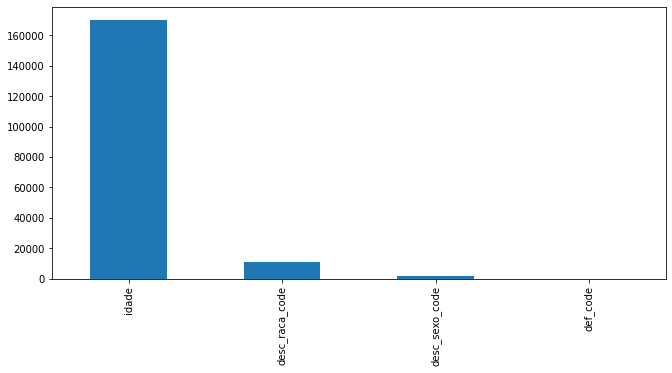

In [ ]:
chi2 = chi2_s.sort_values(ascending=False).plot.bar(figsize=(11,5))

## Resume dataset best features chi2_score

In [ ]:
stat_data = df_chi2_s.describe(include='all').T
stat_data['nulos']= pd.DataFrame(best_df.isnull().sum())
stat_data['percent_nulos']= pd.DataFrame(df.isna().mean().round(4) * 100)
stat_data["type"] = pd.Series(df.dtypes)
stat_data["median"] = pd.Series(df.median(numeric_only=True))
stat_data["skewness"] = pd.Series(df.skew(numeric_only=True))
stat_data["kurtosis"] = pd.Series(df.kurt(numeric_only=True))
stat_data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nulos,percent_nulos,type,median,skewness,kurtosis
idade,591498.0,NaN,NaN,NaN,35.678401,10.918261,11.0,28.0,34.0,42.0,97.0,0.0,0.0,int64,34.0,0.597632,0.060231
desc_raca_code,591498.0,NaN,NaN,NaN,3.003084,1.438076,0.0,1.0,4.0,4.0,5.0,0.0,0.0,int64,4.0,-0.562013,-1.370551
desc_sexo_code,591498.0,NaN,NaN,NaN,0.360192,0.480056,0.0,0.0,0.0,1.0,1.0,0.0,0.0,int64,0.0,0.582466,-1.660739
def_code,591498.0,NaN,NaN,NaN,3.991314,0.258121,0.0,4.0,4.0,4.0,7.0,0.0,0.0,int64,4.0,-6.189190,153.183681
class_salario,591498.0,2.0,1.0,295749.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,category,NaN,NaN,NaN
class_salario_target,591498.0,NaN,NaN,NaN,0.500000,0.500000,0.0,0.0,0.5,1.0,1.0,NaN,0.0,int64,0.5,0.000000,-2.000007


# =========================================================
# Criando Train e Test groups do dataset [Features e Target] para aplicar
# =========================================================

In [ ]:
df_chi2_s.columns
df= df_chi2_s

In [ ]:
X_train_columns = df.columns[0:-2]
target = 'class_salario'

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
    df[X_train_columns],
    df[target], 
    random_state=0)
print("Dados treino {}".format(X_train.shape))
print("Dados teste {}".format(X_test.shape))

Dados treino (443623, 4)
Dados teste (147875, 4)


In [ ]:
X_train[X_train_columns]

,idade,desc_raca_code,desc_sexo_code,def_code
56613,56,4,1,4
46475,36,4,1,4
87817,32,1,1,4
20751,37,4,0,4
241507,25,4,0,4
...,...,...,...,...
136780,32,4,0,4
162833,40,1,0,4
126128,55,4,0,4
79062,34,1,0,4


# =========================================================
# Regressão Logística
# =========================================================

In [ ]:
XT = X_train[X_train_columns][:]
XTt = X_test[X_train_columns][:]
clf = LogisticRegression(random_state=0, max_iter=1000,C=3).fit(XT, y_train)
normal_train_resultado = clf.score(XT,y_train)
print("Score de Acuracia para todas caracteristicas [Treino]:",normal_train_resultado)
normal_test_resultado = clf.score(XTt,y_test)
print("Score de Acuracia para todas caracteristicas  [Teste]:",normal_test_resultado)

Score de Acuracia para todas caracteristicas [Treino]: 0.6382829564743037
Score de Acuracia para todas caracteristicas  [Teste]: 0.6387962806424344


# =========================================================
# Probabilidade para cada classe
# =========================================================


In [ ]:
import seaborn as sns
from sklearn import metrics
r_predict_proba = clf.predict_proba(X_test.iloc[:, :])
r_predict = clf.predict(X_test.iloc[:, :])
r_y_test = list(y_test)
r_inter = clf.intercept_

#Probabilidade (Predict_proba)
for i in range(len(r_predict)):
    print("""
    ValorReal=%s, Predicted=%s , 
    Predict_proba (no) =%s , Predict_proba (yes) =%s """ %(r_y_test[i], r_predict[i],round(r_predict_proba[i][0], 4),round(r_predict_proba[i][1], 4)))
    

A saída de streaming foi truncada nas últimas 5000 linhas.
    ValorReal=0, Predicted=0 , 
    Predict_proba (no) =0.5778 , Predict_proba (yes) =0.4222 

    ValorReal=1, Predicted=0 , 
    Predict_proba (no) =0.7246 , Predict_proba (yes) =0.2754 

    ValorReal=0, Predicted=0 , 
    Predict_proba (no) =0.7246 , Predict_proba (yes) =0.2754 

    ValorReal=0, Predicted=0 , 
    Predict_proba (no) =0.5144 , Predict_proba (yes) =0.4856 

    ValorReal=0, Predicted=0 , 
    Predict_proba (no) =0.7686 , Predict_proba (yes) =0.2314 

    ValorReal=1, Predicted=1 , 
    Predict_proba (no) =0.4615 , Predict_proba (yes) =0.5385 

    ValorReal=1, Predicted=1 , 
    Predict_proba (no) =0.2122 , Predict_proba (yes) =0.7878 

    ValorReal=1, Predicted=0 , 
    Predict_proba (no) =0.5291 , Predict_proba (yes) =0.4709 

    ValorReal=0, Predicted=0 , 
    Predict_proba (no) =0.5544 , Predict_proba (yes) =0.4456 

    ValorReal=1, Predicted=0 , 
    Predict_proba (no) =0.5635 , Predict_proba (yes) =

# =========================================================
# Matriz de Confusão
# =========================================================


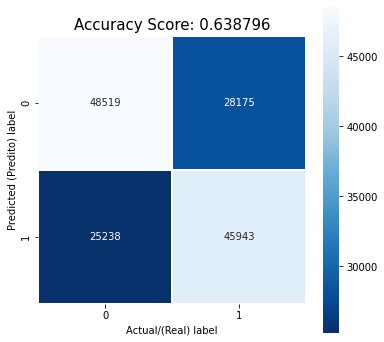

In [ ]:
CM = metrics.confusion_matrix(r_y_test, r_predict)
plt.figure(figsize=(6,6))
sns.heatmap(CM.T, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Actual/(Real) label');
plt.ylabel('Predicted (Predito) label');
all_sample_title = 'Accuracy Score: %.6f' % (normal_test_resultado)
plt.title(all_sample_title, size = 15);
plt.savefig('logistic_results.png')

In [ ]:
# Cross Validation Classification LogLoss
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
kfold = model_selection.KFold(n_splits=2, random_state=0, shuffle=True)
model = clf
scoring = 'accuracy'
results = model_selection.cross_val_score(model, XT, y_train, cv=kfold, scoring=scoring)
print("accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
test_size = 0.33
model.fit(XT, y_train)
predicted_d = model.predict(XTt)
matrix = confusion_matrix(y_test, predicted_d)
report = classification_report(y_test, predicted_d)
print("=============== Report ================== ")
print(report)
print("=============== Report ================== ")

accuracy: 0.637 (0.000)
=============== Report ================== 
              precision    recall  f1-score   support

           0       0.63      0.66      0.64     73757
           1       0.65      0.62      0.63     74118

    accuracy                           0.64    147875
   macro avg       0.64      0.64      0.64    147875
weighted avg       0.64      0.64      0.64    147875

=============== Report ================== 
